In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data 불러오기 

In [2]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")
submission = pd.read_csv("dataset/sample_submission.csv")

# Null 값 처리하기

In [3]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

index               0
gender              0
Annual_income       0
income_type         0
Education           0
family_type         0
house_type          0
DAYS_BIRTH          0
working_day         0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
begin_month         0
car_reality         0
credit              0
dtype: int64

index               0
gender              0
Annual_income       0
income_type         0
Education           0
family_type         0
house_type          0
DAYS_BIRTH          0
working_day         0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
begin_month         0
car_reality         0
dtype: int64


In [4]:
train['occyp_type'] = train['occyp_type'].fillna('Null')
test['occyp_type'] = test['occyp_type'].fillna('Null')

In [5]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

index            0
gender           0
Annual_income    0
income_type      0
Education        0
family_type      0
house_type       0
DAYS_BIRTH       0
working_day      0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
begin_month      0
car_reality      0
credit           0
dtype: int64

index            0
gender           0
Annual_income    0
income_type      0
Education        0
family_type      0
house_type       0
DAYS_BIRTH       0
working_day      0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
begin_month      0
car_reality      0
dtype: int64


# EDA - Numeric

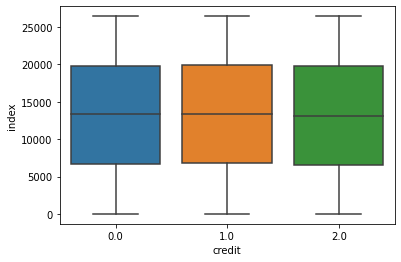

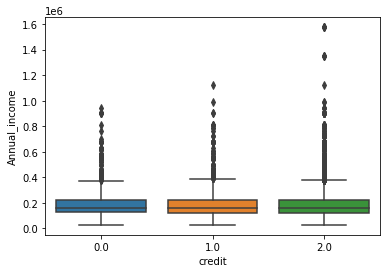

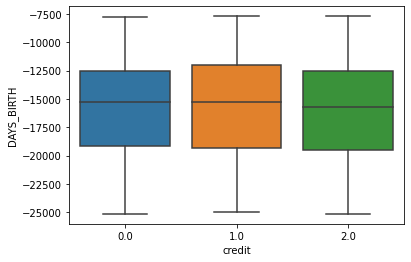

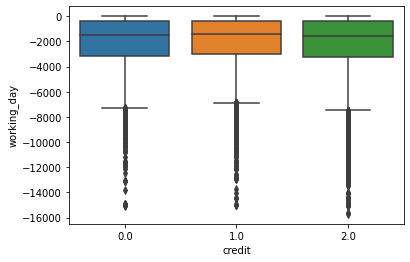

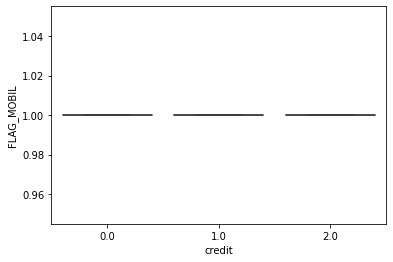

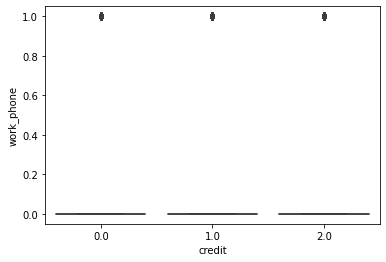

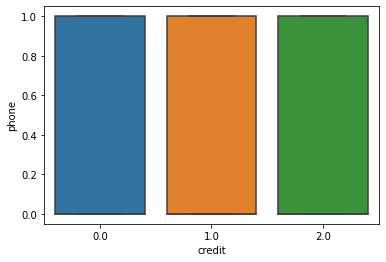

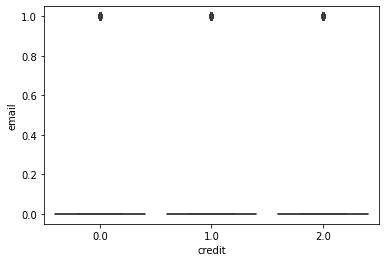

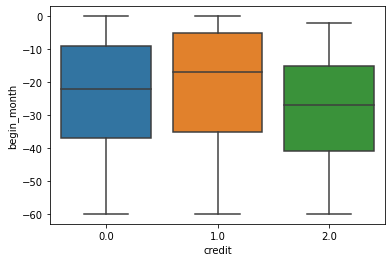

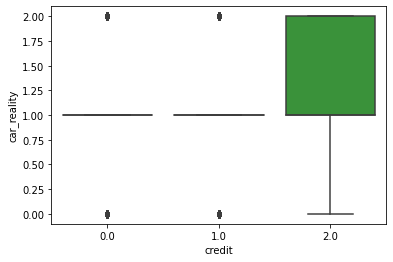

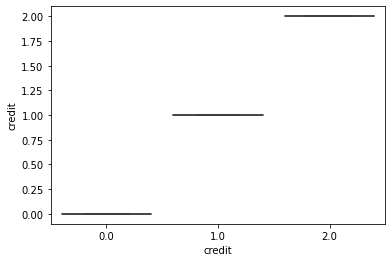

In [6]:
for col in list(train.columns[train.dtypes != 'object']):
    sns.boxplot(x=train['credit'], y=train[col], data=train)
    plt.show();

# EDA - Categorical

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   Annual_income  26457 non-null  float64
 3   income_type    26457 non-null  object 
 4   Education      26457 non-null  object 
 5   family_type    26457 non-null  object 
 6   house_type     26457 non-null  object 
 7   DAYS_BIRTH     26457 non-null  int64  
 8   working_day    26457 non-null  int64  
 9   FLAG_MOBIL     26457 non-null  int64  
 10  work_phone     26457 non-null  int64  
 11  phone          26457 non-null  int64  
 12  email          26457 non-null  int64  
 13  occyp_type     26457 non-null  object 
 14  begin_month    26457 non-null  float64
 15  car_reality    26457 non-null  int64  
 16  credit         26457 non-null  float64
dtypes: float64(3), int64(8), object(6)
memory usage: 3

In [8]:
# output class 확인
train['credit'].unique()

array([1., 2., 0.])

In [9]:
# 데이터의 균형도 확인 
train['credit'].value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

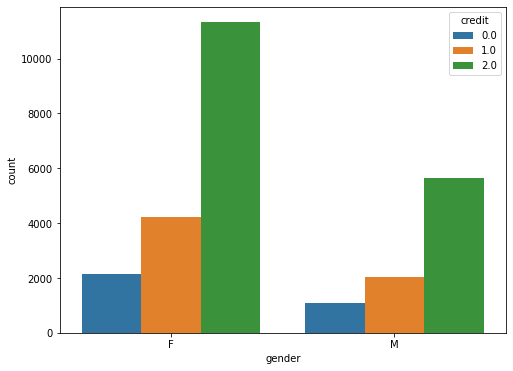

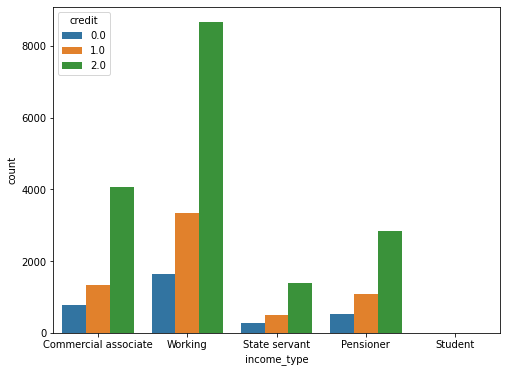

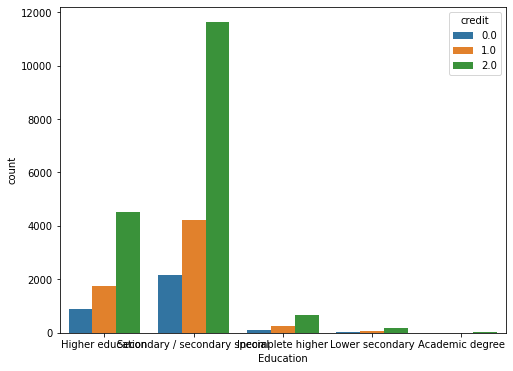

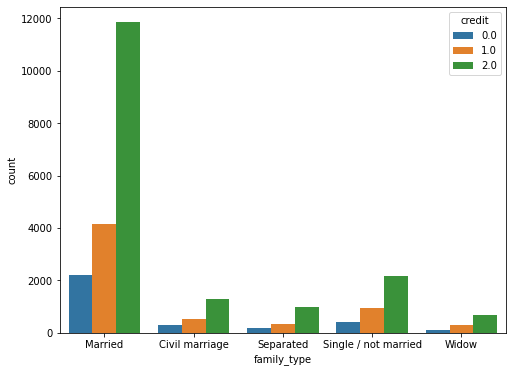

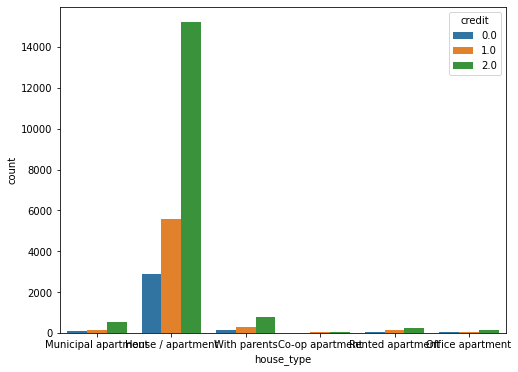

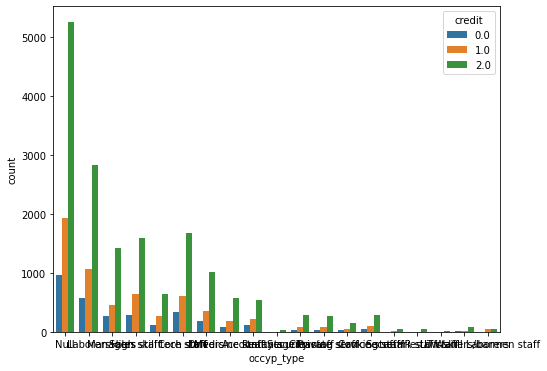

In [10]:
for i in list(train.columns[train.dtypes == 'object']):
    fig = plt.figure(figsize=(8,6))
    sns.countplot(x=i, hue=train['credit'], data=train)
    plt.show()

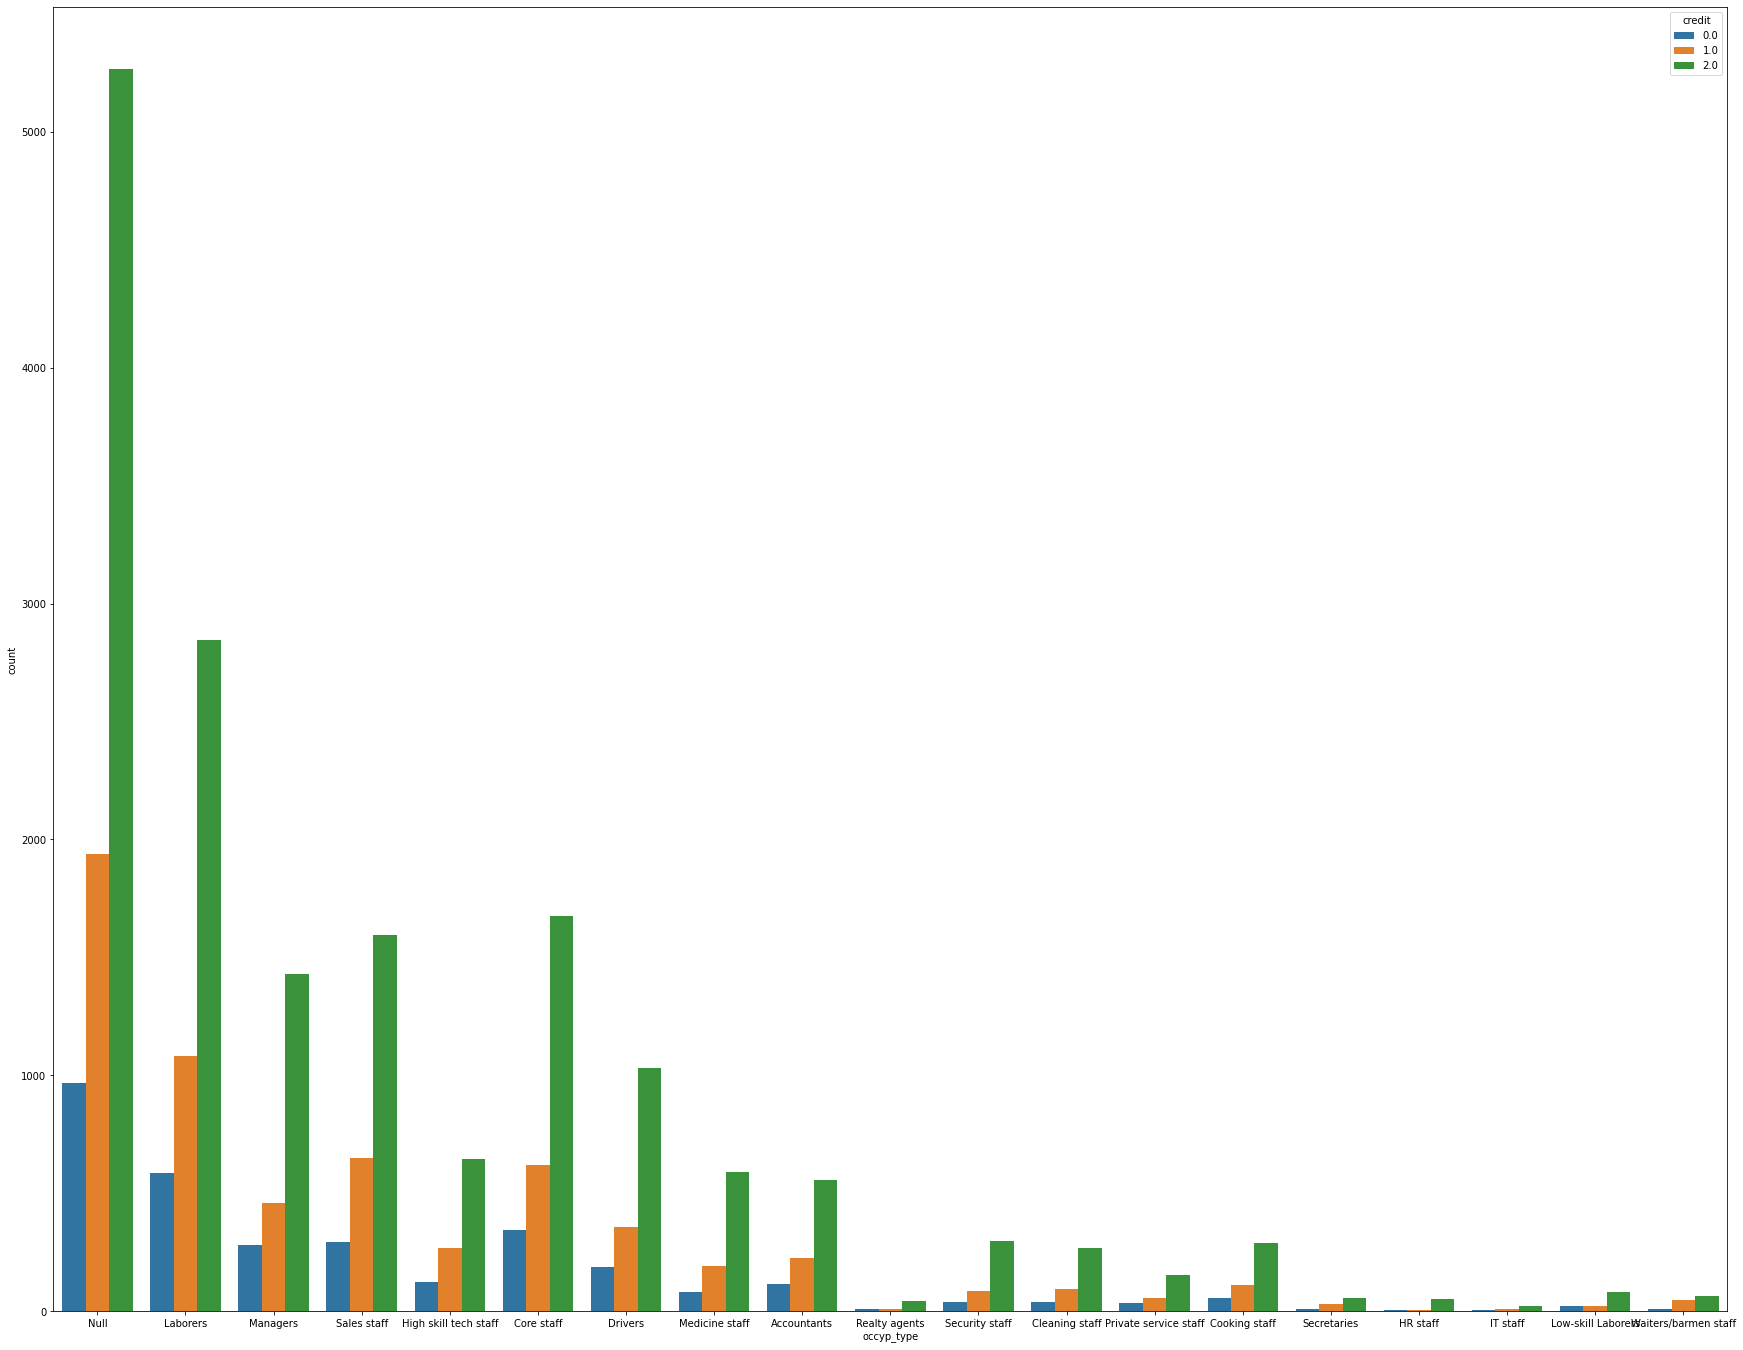

In [11]:
fig = plt.figure(figsize=(30,24))
sns.countplot(x=i, hue=train['credit'], data=train)
plt.show()

In [12]:
# 범주형 데이터 확인
for col in list(train.columns[train.dtypes == 'object']):
    print(col, ':', train[col].unique())

gender : ['F' 'M']
income_type : ['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
Education : ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
family_type : ['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
house_type : ['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']
occyp_type : ['Null' 'Laborers' 'Managers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Drivers' 'Medicine staff' 'Accountants' 'Realty agents'
 'Security staff' 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Secretaries' 'HR staff' 'IT staff' 'Low-skill Laborers'
 'Waiters/barmen staff']


# Data 전처리

In [13]:
train['gender'] = train['gender'].replace({'F':0, 'M':1}) # binary type (여성 - 0, 남성 - 1)
train.drop('FLAG_MOBIL', axis=1, inplace=True)
train

,index,gender,Annual_income,income_type,Education,family_type,house_type,DAYS_BIRTH,working_day,work_phone,phone,email,occyp_type,begin_month,car_reality,credit
0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,Null,-6.0,0,1.0
1,1,0,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,-5.0,1,1.0
2,2,1,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,-22.0,2,2.0
3,3,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,-37.0,1,0.0
4,4,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,-26.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,0,0,0,Core staff,-2.0,0,1.0
26453,26453,0,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,0,0,0,Null,-47.0,1,2.0
26454,26454,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,0,0,0,Core staff,-25.0,1,2.0
26455,26455,1,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,0,0,0,Laborers,-59.0,1,2.0


In [14]:
train = pd.get_dummies(train)
train

,index,gender,Annual_income,DAYS_BIRTH,working_day,work_phone,phone,email,begin_month,car_reality,...,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Null,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,0,202500.0,-13899,-4709,0,0,0,-6.0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,247500.0,-11380,-1540,0,0,1,-5.0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1,450000.0,-19087,-4434,0,1,0,-22.0,2,...,0,1,0,0,0,0,0,0,0,0
3,3,0,202500.0,-15088,-2092,0,1,0,-37.0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,0,157500.0,-15037,-2105,0,0,0,-26.0,2,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,225000.0,-12079,-1984,0,0,0,-2.0,0,...,0,0,0,0,0,0,0,0,0,0
26453,26453,0,180000.0,-15291,-2475,0,0,0,-47.0,1,...,0,0,0,1,0,0,0,0,0,0
26454,26454,0,292500.0,-10082,-2015,0,0,0,-25.0,1,...,0,0,0,0,0,0,0,0,0,0
26455,26455,1,171000.0,-10145,-107,0,0,0,-59.0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
test['gender'] = train['gender'].replace({'F':0, 'M':1}) # binary type (여성 - 0, 남성 - 1)

In [25]:
test['FLAG_MOBIL'].value_counts()
test.drop('FLAG_MOBIL', axis=1, inplace=True)

In [27]:
test = pd.get_dummies(test)
test

,index,gender,Annual_income,DAYS_BIRTH,working_day,work_phone,phone,email,begin_month,car_reality,...,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Null,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,26457,0,112500.0,-21990,0,0,1,0,-60.0,1,...,0,0,0,1,0,0,0,0,0,0
1,26458,0,135000.0,-18964,-8671,0,1,0,-36.0,1,...,0,0,0,0,0,0,0,0,0,0
2,26459,1,69372.0,-15887,-217,1,1,0,-40.0,1,...,0,0,0,0,0,0,0,0,0,0
3,26460,0,112500.0,-19270,-2531,1,0,0,-41.0,1,...,0,0,0,0,0,0,0,0,0,0
4,26461,0,225000.0,-17822,-9385,1,0,0,-8.0,2,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,202500.0,-18593,-5434,1,1,0,-19.0,2,...,0,0,0,0,0,0,0,0,0,0
9996,36453,1,202500.0,-10886,-1315,1,0,0,-34.0,2,...,0,0,0,0,0,0,0,0,0,0
9997,36454,1,292500.0,-21016,-14018,0,0,0,-55.0,1,...,0,0,1,0,0,0,0,0,0,0
9998,36455,0,180000.0,-16541,-1085,0,1,0,-33.0,1,...,0,0,0,1,0,0,0,0,0,0
